In [ ]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Criando dataset

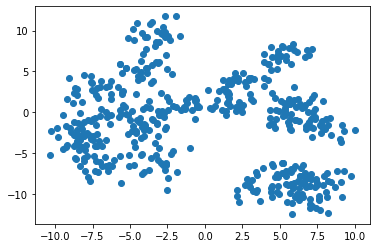

In [ ]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

## Função para calcular o melhor número de cluster através das distancias entre pontos

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

## Cria uma lista de distâncias e calcula o número de cluster ideal

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(f'Number of optimal cluster is {n}')

Number of optimal cluster is 4


## Plot a curva de distâncias para visualizar o melhor número de cluster.
## Fica no "joelho" da curva o número ideal

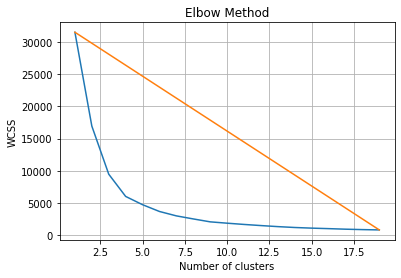

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

## Plota o clusters criados de acordo com o K-means

[[ 6.54167452 -0.57833569]
 [-6.00093158 -3.22985389]
 [ 2.37055809  3.33784875]
 [-4.77234911  5.66811008]
 [ 6.01305095 -8.90895584]]
4717.404091931214


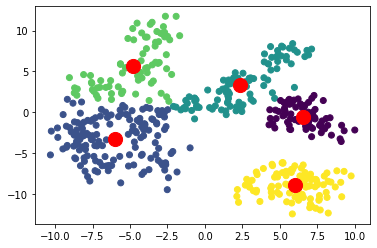

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
print(kmeans.cluster_centers_) #coordinates of centroid
print(kmeans.inertia_) #soma dos quadrados intra-clusters
plt.show()
